<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/02_neural_netwrok_model_for_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usually There type fo classificaiton
1. Binary Classification
2. Multiclass classification
3. Multilabel Classification


In [1]:
# Lets get the data for calssisfication

from sklearn.datasets import make_circles

In [2]:
#samples 
n_samples=1000

#create data 
X,y = make_circles(n_samples,noise=0.03)


In [3]:
X,y

(array([[-0.75517289, -0.24813461],
        [-0.36758374, -0.97672378],
        [ 0.59761722, -0.54033827],
        ...,
        [-0.56804533,  0.58296672],
        [ 0.86966412, -0.49693984],
        [-0.04391117,  0.82533488]]),
 array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 

In [4]:
import pandas as pd
circle_data = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circle_data.head()

,X0,X1,Label
0,-0.755173,-0.248135,1
1,-0.367584,-0.976724,0
2,0.597617,-0.540338,1
3,0.793436,-0.137941,1
4,-0.883113,-0.532785,0


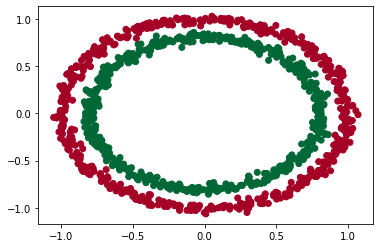

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn)

In [6]:

X_data = circle_data.drop('Label', axis=1)
y_data = circle_data["Label"]

X_data.head(), y_data.head()

(         X0        X1
 0 -0.755173 -0.248135
 1 -0.367584 -0.976724
 2  0.597617 -0.540338
 3  0.793436 -0.137941
 4 -0.883113 -0.532785, 0    1
 1    0
 2    1
 3    1
 4    0
 Name: Label, dtype: int64)

In [7]:

#Lets split the model for train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
len(X_train),len(X_test)

(800, 200)

In [8]:


import tensorflow as tf

In [9]:
# Lets create a model.
tf.random.set_seed(42)

# Create a model with one hidden layer
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)

])

# Comiple the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model.

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 4.4250 - accuracy: 0.4650
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.3047 - accuracy: 0.4450
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2551 - accuracy: 0.4313
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1243 - accuracy: 0.4187
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0921 - accuracy: 0.4150
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0327 - accuracy: 0.4112
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9817 - accuracy: 0.4137
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9560 - accuracy: 0.4087
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9357 - accuracy: 0.4050
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9112 - accuracy: 0.4075
Epoch 11/

# what ??? Just 48 % accuracy.
  Need to add change hyper parameters

In [10]:
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)

])

#compile a model

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# foit the model

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 4.3778 - accuracy: 0.4412
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1608 - accuracy: 0.4563
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0431 - accuracy: 0.4613
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 3.7808 - accuracy: 0.4650
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 3.5345 - accuracy: 0.4712
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 3.2897 - accuracy: 0.4712
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 2.9330 - accuracy: 0.4712
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 1.5778 - accuracy: 0.4688
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8377 - accuracy: 0.4650
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8071 - accuracy: 0.4638
Epoch 11/

In [11]:
#Still 50 % lets add one more hidden layer of 100 neurons.
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 2.8746 - accuracy: 0.4588
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.4837
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7024 - accuracy: 0.5175
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.5075
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4900
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.5113
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5113
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.4787
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5050
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4925
Epoch 11/

In [12]:
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4850


[0.6953992247581482, 0.48500001430511475]

In [13]:
# Lets add the activation function with 2 hidden layers and learning rate as 0.001

In [14]:
tf.random.set_seed(42)

# Create a model

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#Compile the model

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit the model

history_4 = model_4.fit(X_train,y_train,epochs=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4975
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5125
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5113
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5250
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.5250
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5362
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5350
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5375
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5387
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5437
Epoch 11/

In [16]:
model_4.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.1259 - accuracy: 0.9925


[0.12588253617286682, 0.9925000071525574]

In [17]:
# lets try that model to learn faster.

In [20]:
tf.random.set_seed(42)
# create a model
model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#compile a model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

#fit the model
history_5=model_5.fit(X_train,y_train,epochs=25)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5100
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5550
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5400
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5913
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.5738
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.6488
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6303 - accuracy: 0.7113
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5948 - accuracy: 0.7563
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5293 - accuracy: 0.8813
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.9162
Epoch 11/25
25/25 [

7/7 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9850


[0.0753655731678009, 0.9850000143051147]

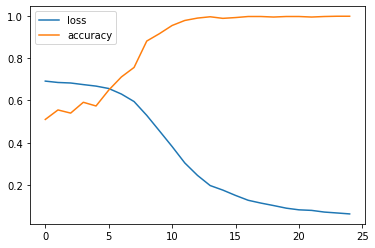

In [23]:
pd.DataFrame(history_5.history).plot()
model_5.evaluate(X_test,y_test)


In [ ]:
# SO just by increasing the learning rate by 10% we are able to trian the model in 1/10th of epochs 